In [ ]:
pip install tensorflow

In [2]:
import numpy as np,pandas as pd,matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, Dropout,LSTM
from tensorflow.keras.models import Sequential
plt.style.use('fivethirtyeight')

In [3]:
import requests
# api key is unique key for every user.
api_key='e798902f305c4f249b50b14ae1dcc15d'
symbol='BTC/USD'
interval='5min'
order='asc'
start_data='2023-05-01 00:00:00'
end_date='2023-5-20 00:00:00'
api_url=f'https://api.twelvedata.com/time_series?symbol={symbol}&start_date={start_data}&end_date={end_date}&interval={interval}&order={order}&apikey={api_key}'
data = requests.get(api_url).json()
data.keys()


dict_keys(['meta', 'values', 'status'])

In [4]:
import pandas as pd
data_final=pd.DataFrame(data['values'])
data_final


,datetime,open,high,low,close
0,2023-05-02 14:50:00,28479.36000,28499.32000,28300.00000,28368.15000
1,2023-05-02 14:55:00,28364.59000,28402.82000,28329.61000,28380.45000
2,2023-05-02 15:00:00,28377.57000,28384.90000,28269.70000,28342.10000
3,2023-05-02 15:05:00,28336.86000,28393.13000,28303.75000,28380.82000
4,2023-05-02 15:10:00,28381.48000,28497.50000,28381.48000,28463.26000
...,...,...,...,...,...
4995,2023-05-19 23:40:00,26898.55000,26902.09000,26893.62000,26902.09000
4996,2023-05-19 23:45:00,26902.08000,26911.39000,26892.77000,26894.49000
4997,2023-05-19 23:50:00,26894.49000,26894.49000,26873.15000,26875.44000
4998,2023-05-19 23:55:00,26875.45000,26892.93000,26872.43000,26890.27000


In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(data_final['close'].values.reshape(-1,1))
scaled_data
# it is sclaing data betweein 0 to 1

array([[0.62674201],
       [0.62993765],
       [0.61997402],
       ...,
       [0.2389244 ],
       [0.24277734],
       [0.24301897]])

In [ ]:
time_interval_to_train=24
prediction_interval=12
x_train=[]
y_train=[]
for i in range(time_interval_to_train,len(scaled_data)-prediction_interval):
  x_train.append(scaled_data[i-time_interval_to_train: i,0])
  y_train.append(scaled_data[i+prediction_interval: i,0])
x_train=np.array(x_train)
y_train=np.array(y_train)
x_train

array([[0.62674201, 0.62993765, 0.61997402, ..., 0.66591322, 0.66820733,
        0.65771369],
       [0.62993765, 0.61997402, 0.63003378, ..., 0.66820733, 0.65771369,
        0.66227592],
       [0.61997402, 0.63003378, 0.65145233, ..., 0.65771369, 0.66227592,
        0.65603274],
       ...,
       [0.23248376, 0.22978956, 0.23023383, ..., 0.24191738, 0.24034814,
        0.23828007],
       [0.22978956, 0.23023383, 0.23434399, ..., 0.24034814, 0.23828007,
        0.23914523],
       [0.23023383, 0.23434399, 0.23610808, ..., 0.23828007, 0.23914523,
        0.23991946]])

In [21]:
y_train

array([], shape=(4964, 0), dtype=float64)

In [22]:
model=Sequential()
model.add(LSTM(128,return_sequences=True,input_shape=(x_train.shape[1],1), activation='relu'))
model.add(Dropout(0.4))
model.add(LSTM(64,return_sequences=True,activation="relu"))
model.add(Dropout(0.3))
model.add(LSTM(32,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

In [23]:
from sklearn.preprocessing import MinMaxScaler
model.compile(loss='mean_squared_error',optimizer='adam', metrics=['accuracy'])

In [24]:
model.fit(x_train,y_train,epochs=10,batch_size=64)

Epoch 1/10
78/78 [==============================] - 14s 72ms/step - loss: nan - accuracy: nan
Epoch 2/10
78/78 [==============================] - 6s 72ms/step - loss: nan - accuracy: nan
Epoch 3/10
78/78 [==============================] - 6s 70ms/step - loss: nan - accuracy: nan
Epoch 4/10
78/78 [==============================] - 6s 72ms/step - loss: nan - accuracy: nan
Epoch 5/10
78/78 [==============================] - 6s 71ms/step - loss: nan - accuracy: nan
Epoch 6/10
78/78 [==============================] - 6s 72ms/step - loss: nan - accuracy: nan
Epoch 7/10
78/78 [==============================] - 6s 71ms/step - loss: nan - accuracy: nan
Epoch 8/10
78/78 [==============================] - 6s 71ms/step - loss: nan - accuracy: nan
Epoch 9/10
78/78 [==============================] - 5s 70ms/step - loss: nan - accuracy: nan
Epoch 10/10
78/78 [==============================] - 6s 77ms/step - loss: nan - accuracy: nan


In [25]:
test_start='2021-10-20 00:00:00'
test_end='2021-11-03 00:00:00'
test_api_url=f'https://api.twelvedata.com/time_series?symbol={symbol}&start_date={test_start}&end_date={test_end}&interval={interval}&order={order}&apikey={api_key}'
test_data = requests.get(test_api_url).json()
test_data_final=pd.DataFrame(test_data['values'])
test_data_final

,datetime,open,high,low,close
0,2021-10-20 00:00:00,64300.01172,64381.44922,64235.94141,64257.17188
1,2021-10-20 00:05:00,64255.21875,64265.83984,64099.76953,64134.44922
2,2021-10-20 00:10:00,64133.71875,64207.78125,64133.71875,64177.23047
3,2021-10-20 00:15:00,64185.44922,64232.28906,64119.21875,64137.94141
4,2021-10-20 00:20:00,64137.69922,64166.08984,64083.42188,64083.42188
...,...,...,...,...,...
4018,2021-11-02 23:40:00,62904.96094,63113.03125,62886.03906,63113.03125
4019,2021-11-02 23:45:00,63113.69141,63177.92969,63064.35938,63175.19922
4020,2021-11-02 23:50:00,63175.19141,63282.32031,63157.66016,63157.66016
4021,2021-11-02 23:55:00,63159.26953,63261.10938,63159.26953,63261.10938


In [27]:
bitcoin_prices=pd.to_numeric(test_data_final['close'],errors='coerce').values
test_inputs=test_data_final['close'].values
test_inputs=test_inputs.reshape(-1,1)
model_inputs=scaler.fit_transform(test_inputs)
model_inputs

array([[0.70139059],
       [0.68760838],
       [0.69241288],
       ...,
       [0.57791135],
       [0.58952908],
       [0.59956009]])

In [33]:
x_test=[]
# time_interval_to_train=24
for x in range(time_interval_to_train,len(model_inputs)):
  x_test.append(model_inputs[x-time_interval_to_train:x,0])

x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))


In [34]:
prediction_prices=model.predict(x_test)
prediction_prices=scaler.inverse_transform(prediction_prices)

125/125 [==============================] - 3s 19ms/step


In [1]:
plt.plot(bitcoin_prices,label='Bitcoin Prices')
# plt.plot(prediction_prices,label='Predicted_prices')
plt.title('BITCOIN Price Predictor')
plt.xlabel('5 min Time Interval')
plt.ylabel('BITCOIN Price')
plt.legend()
plt.show()

NameError: name 'plt' is not defined

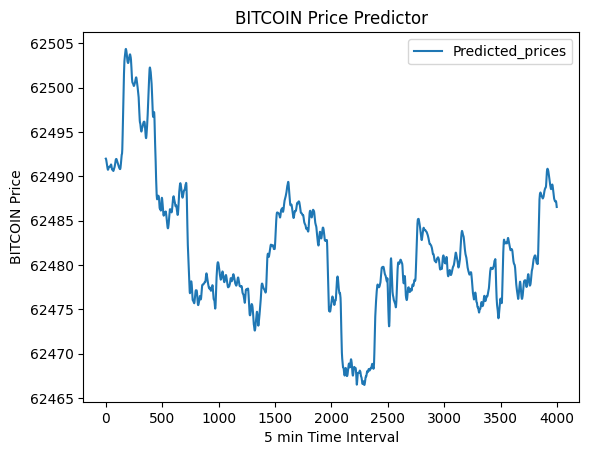

In [42]:
plt.plot(prediction_prices,label='Predicted_prices')
plt.title('BITCOIN Price Predictor')
plt.xlabel('5 min Time Interval')
plt.ylabel('BITCOIN Price')
plt.legend()
plt.show()